# Import required libaries

In [1]:
# package(s) related to time, space and id
import datetime, time
import platform

# you need these dependencies (you can get these from anaconda)
# package(s) related to the simulation
import simpy

# spatial libraries 
import shapely.geometry
from simplekml import Kml, Style

# package(s) for data handling
import numpy as np
from scipy.interpolate import griddata
import pickle
import networkx as nx

# packages for route planner
import main
import Costfunction
import Input
import Create_Graph
import Calc_route

# packages for plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib notebook

# Input

In [2]:
location_from_site = shapely.geometry.Point(4.18055556, 52.18664444)          # lon, lat
location_to_site = shapely.geometry.Point(4.25222222, 52.11428333)            # Lon, Lat

vship = 3                                                                     #m/s

filename_flowmodel = "flowmodel.cdf"
filename_wavemodel = "wavemodel.cdf"
filename_windmodel = "windmodel.cdf"
filename_restriction = "Restrictions.kmz"

Filename_edges = "name"

# temp Input

In [3]:
Lf = 100                       #m
Bf = 100                       #m
Nf = 100

Ng = 50

x_start = 20
y_start = 20

x_target = 50
y_target = 50

vship = 3
name_textfile= "EdgesNf={}_vship={}_start=({},{})_target=({},{})_L={}_B={}.txt".format(Nf, 
                                                                                     vship, 
                                                                                     x_start,
                                                                                     y_start, 
                                                                                     x_target, 
                                                                                     y_target,
                                                                                     Lf,
                                                                                     Bf,)

# Define properties

In [4]:
start_time = time.time()
Input = type('Input', (Input.Has_start_and_target, 
                       Input.Has_flow_testcase,
                       Costfunction.Has_costfunction_time,
                      ), {})

New_Graph = type('Create_Graph', (Create_Graph.Has_grid_flow,
                                  Create_Graph.Has_grid_node_dir, 
                                  Create_Graph.Has_edges_create_order4_alldir
                                    ), {})

Calc_route = type('Calc_route', (Calc_route.Path_Dijkstra,
                                 Calc_route.Path_length_Dijkstra,
#                                 Calc_route.Save_edges_to_text,
                               ),{})

In [5]:
B= 200
L=50

print((50 / (L/B)),(50  / (B/L)),(50 / (L/B))*(50  / (B/L)))

200.0 12.5 2500.0


# Core computation

In [6]:
Data = {"Lf": Lf,
        "Bf": Bf,
        "Nf": Nf,
        "Ng": Ng,
        "x_start": x_start,
        "y_start": y_start,
        "x_target": x_target,
        "y_target": y_target,
        "vship": vship,
}
Input_data = Input(**Data)
Graph_data = {"Data": Input_data,
              "name_textfile": name_textfile}

In [7]:
Graph = New_Graph(**Graph_data)
Graph.G.add_weighted_edges_from(Graph.edges)

In [8]:
Graph_data_dijkstra = {"Graph": Graph,
                        "Data": Input_data,
#                       "name_textfile_save": name_textfile_save,
                      }

Route = Calc_route(**Graph_data_dijkstra)
stop_time = time.time()
computation_time = stop_time - start_time
print("the computational time is:", round(computation_time,2), "sec")

the computational time is: 2.83 sec


# Postprocesing

Route completed in 0 hour 0 minutes and 15.14 seconds
None


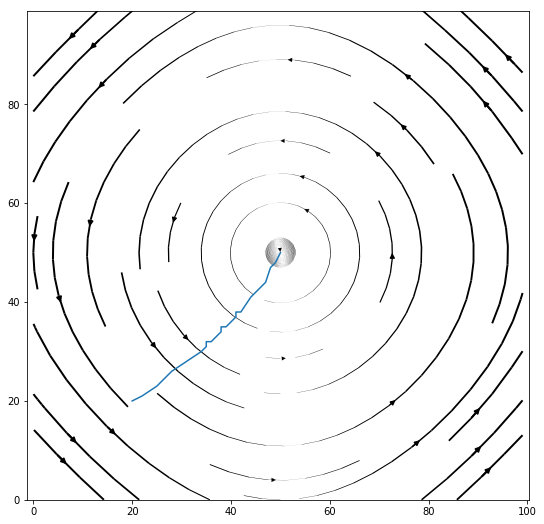

In [9]:
fig, ax = plt.subplots();
fig.set_size_inches(9, 9)
plt.axis('equal');

lw = 2*Input_data.speed_input / Input_data.speed_input.max()
plt.streamplot(Input_data.Yf, Input_data.Xf,-Input_data.flow_v_input, -Input_data.flow_u_input, density=0.5, color='k', linewidth=lw)
plt.plot(Route.route[:,0],Route.route[0:,1])
#plt.ylim(0,Input_data.B)
#plt.xlim(0,Input_data.L);

print(Input_data.print_score(Route.score))

fig, ax = plt.subplots();
fig.set_size_inches(9, 9)
plt.axis('equal');

q = ax.quiver(Input_data.Xf, Input_data.Yf,Input_data.flow_u_input, Input_data.flow_v_input);
ax.quiverkey(q, X=0.3, Y=1.1, U=10, label='Quiver key, length = 10', labelpos='E');
plt.plot(Route.route[:,0],Route.route[0:,1])

#print(Route.route)
print(Route.score)

with open(name_textfile, "wb") as fp:
    pickle.dump(Graph.edges, fp)